<a href="https://colab.research.google.com/github/Islahuddin-isla/livecode3/blob/main/h8dsft_P0LC3_Islahuddin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import auth
from google.cloud import bigquery
auth.authenticate_user()
print('Authenticated')

project_id = "livecode3-15498" #GUNAKAN GCP PROJECT-ID KALIAN MASING-MASING
client = bigquery.Client(project=project_id)

Authenticated


In [38]:
df = client.query('''
SELECT sale_dollars
FROM `bigquery-public-data.iowa_liquor_sales.sales`
LIMIT 5000
''').to_dataframe()


In [10]:
df

,sale_dollars
0,-332.64
1,-468.00
2,-237.12
3,-67.50
4,-67.50
...,...
4995,39.93
4996,38.25
4997,38.25
4998,38.25


In [37]:
mean_value = df.mean()
median_value = df.median()
mode_value = df.mode()
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")

Mean: sale_dollars    26.858843
dtype: float64
Median: sale_dollars    16.2
dtype: float64
Mode:    sale_dollars
0          77.4


Skewness:: sale_dollars    1.216067
dtype: float64


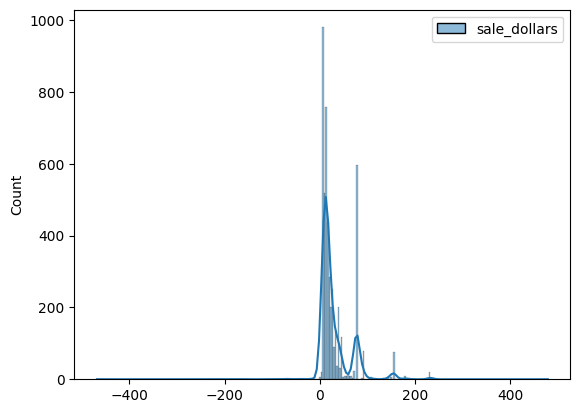

In [20]:
skewness_value = df.skew()
print(f"Skewness:: {skewness_value}")

import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df, kde=True)
plt.show()

In [45]:
from scipy import stats
import numpy as np
z_scores = stats.zscore(df)
abs_z_score = np.abs(z_scores)

treshold = 3
filtered_entries = (abs_z_score < treshold)
cleaned_data = df[filtered_entries]

print(f"Jumlah data sebelum dibersihkan: {len(df)}")
print(f"Jumlah data setelah dibersihkan: {len(cleaned_data)}")



Jumlah data sebelum dibersihkan: 5000
Jumlah data setelah dibersihkan: 5000


In [26]:
final_data = cleaned_data.reset_index(drop=True)
print(final_data)

      sale_dollars
0              NaN
1              NaN
2              NaN
3           -67.50
4           -67.50
...            ...
4995         39.93
4996         38.25
4997         38.25
4998         38.25
4999         38.25

[5000 rows x 1 columns]


In [28]:
final_data.to_csv('islahuddin.csv', index=False)

In [30]:
!pip install fastapi uvicorn pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.4 MB/s eta 0:00:00


In [34]:
from fastapi import FastAPI
import pandas as pd

app = FastAPI()

df = pd.read_csv('islahuddin.csv')
data = df.to_dict(orient="records")

@app.get("/data")
def read_data():
  return {"data": data}